In [1]:
import numpy as np

In [22]:
def binomial_tree(s_ini, T, u, d, N):
    S = np.zeros([N+1, N+1])
    for j in range(N,-1,-1):
        for i in range(0,j+1):
            S[j,i]= s_ini* (u**i) * (d**(j-i))
    return S

binomial_tree(100, 1, 1.2, 0.8, 2)

array([[100.,   0.,   0.],
       [ 80., 120.,   0.],
       [ 64.,  96., 144.]])

In [49]:
def binomial_tree_with_call(s_ini, K, T, u, d, N):
    C = np.zeros([N+1, N+1])
    S = np.zeros([N+1, N+1])
    for i in range(N, -1, -1):
        for j in range(0, i+1):
            S[i,j] = s_ini*(u**j)*(d**(i-j))
            C[i,j] = max(S[i,j]-K,0)
    return S, C
binomial_tree_with_call(100, 90, 1, 1.2, 0.8, 10)

(array([[100.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 80.        , 120.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 64.        ,  96.        , 144.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 51.2       ,  76.8       , 115.2       , 172.8       ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 40.96      ,  61.44      ,  92.16      , 138.24      ,
         207.36      ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 32.768     ,  49.152     ,  73.728     , 110.592     ,
         165.888     , 24

In [77]:
def binomial_call_pricing(s_ini, K, T, r, u, d, N):
    dt = T/N
    p = (np.exp(r*dt)-d)/(u-d)
    C = np.zeros([N+1, N+1])
    S = np.zeros([N+1, N+1])
    for i in range(0, N+1):
        S[N,i] = s_ini * (u**i) * (d**(N-i))
        C[N,i] = max(S[N,i]-K, 0)
    for j in range(N-1,-1,-1):
        for i in range(0, j+1):
            C[j,i] = np.exp(-r*dt)*(p*C[j+1, i+1] + (1-p)*C[j+1, i])
            S[j,i] = s_ini * (u**i) * (d**(j-i))
    return round(C[0,0],2), S, C

Call= binomial_call_pricing(100, 90, 10, 0, 1.2, 0.8, 2)[0]
print(Call)

16.5


# ***Lesson 2 Put Call Parity***

In [78]:
def binomial_put_pricing(s_ini, K, T, r, u, d, N):
    dt = T/N
    p = (np.exp(r*dt)-d)/(u-d)
    S = np.zeros([N+1, N+1])
    P = np.zeros([N+1, N+1])
    for i in range(0,N+1):
        S[N,i] = s_ini* (u**i) * (d**(N-i))
        P[N,i] = max(K-S[N,i],0)
    for i in range(N-1, -1, -1):
        for j in range(0, i+1):
            S[i,j] = s_ini * (u**j) * (d**(i-j))
            P[i,j] = np.exp(-r*dt)*(p*P[i+1, j+1] + (1-p)*P[i+1,j])
    return round(P[0,0].item(),2), S, P
binomial_put_pricing(36, 36, 50, 0.01, 1.1, 0.7, 50)

(7.58,
 array([[3.60000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.52000000e+01, 3.96000000e+01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.76400000e+01, 2.77200000e+01, 4.35600000e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.32132126e-06, 2.07636197e-06, 3.26285453e-06, ...,
         3.49262042e+03, 0.00000000e+00, 0.00000000e+00],
        [9.24924879e-07, 1.45345338e-06, 2.28399817e-06, ...,
         2.44483429e+03, 3.84188246e+03, 0.00000000e+00],
        [6.47447415e-07, 1.01741737e-06, 1.59879872e-06, ...,
         1.71138400e+03, 2.68931772e+03, 4.22607070e+03]], shape=(51, 51)),
 array([[ 7.5822903 ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 9.54336876,  7.11166527,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [11.63290642,  9.06090302,  6.

### Checking Put Call Parity

In [102]:
P0, S, P = binomial_put_pricing(100, 90, 10, 0, 1.2, 0.8, 10)
C0, S, C = binomial_call_pricing(100, 90, 10, 0, 1.2, 0.8, 10)
print(f'For S=100, u=1.2, d=0.8 and r=0, 10 year horizon, call price is \n {C}, and put price is  \n {P}')

For S=100, u=1.2, d=0.8 and r=0, 10 year horizon, call price is 
 [[2.93845445e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.57572106e+01 4.30118784e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.17743934e+00 2.43369819e+01 6.16867749e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.49687648e+00 1.18580022e+01 3.68159616e+01 8.65575882e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.04779760e-01 4.48897320e+00 1.92270312e+01 5.44048920e+01
  1.18710284e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00955952e+00 7.96838688e+00 3.04856755e+01
  7.83241085

In [103]:
def put_call_parity_check(S,K,C,P,r,t):
    for i in range(0,t+1):
        for j in range(0,i):
            parity = C[i,j]-P[i,j] - (S[i,j]-K*np.exp(-r*t))
            if abs(parity) >1e-5:
                return f'There is an arbitrage opportunity : {parity}'
    return 'Put Call Parity is respected'
put_call_parity_check(S, 90, C, P, 0, 10)

'Put Call Parity is respected'

# L3 Delta Hedging

In [125]:
def call_option_delta(s_ini,K,T,r,u,d,N):
    dt = T/N
    p = (np.exp(r*dt)-d)/(u-d)
    S = np.zeros([N+1, N+1])
    C = np.zeros([N+1, N+1])
    Delta = np.zeros([N, N])
    for i in range(0,N+1):
        S[N,i] = s_ini * (u**i) * (d**(N-i))
        C[N,i] = max(S[N,i]-K,0)
    for i in range(N-1, -1, -1):
        for j in range(0,i+1):
            S[i,j] = s_ini * (u**j) * (d**(i-j))
            C[i,j] = np.exp(-r*dt)*(p*C[i+1, j+1] + (1-p)*C[i+1, j])
            Delta[i,j] = (C[i+1,j+1]-C[i+1,j])/(S[i+1,j+1]-S[i+1,j])
    return C[0,0], C, S,  Delta

In [126]:
price, call, S, delta = call_option_delta(100, 90, 10, 0, 1.2, 0.8, 10)
print("Delta: \n", delta)

Delta: 
 [[0.68136669 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.53623571 0.77812069 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.36566897 0.64994686 0.86356991 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.1945407  0.47975449 0.76340844 0.93034422 0.         0.
  0.         0.         0.         0.        ]
 [0.06161862 0.28315541 0.61082055 0.8651337  0.9738179  0.
  0.         0.         0.         0.        ]
 [0.         0.10269771 0.40346055 0.74906055 0.9425158  0.99468597
  0.         0.         0.         0.        ]
 [0.         0.         0.17116284 0.55832568 0.87621712 0.98671492
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.2852714  0.74036187 0.96678729
  1.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.47545234 0.91696823
  1.         1.         1.         0.      

In [115]:
price_array = []
Ns = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    price, call, S, delta = call_option_delta(100, 90, 1, 0, 1.2, 0.8, N)
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 15.00
With N =  10, the price is 29.38
With N = 100, the price is 70.32
With N = 200, the price is 85.40
With N = 300, the price is 92.33
With N = 400, the price is 95.84
With N = 500, the price is 97.70
With N = 600, the price is 98.71
With N = 700, the price is 99.27
With N = 800, the price is 99.58
With N = 900, the price is 99.76
With N = 1000, the price is 99.86
With N = 1500, the price is 99.99
With N = 2000, the price is 100.00
With N = 2500, the price is 100.00


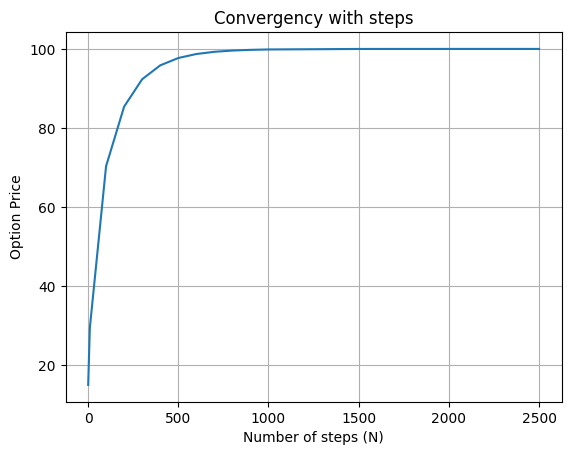

In [116]:
import matplotlib.pyplot as plt
plt.plot(Ns, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

# L4 Adjusting u and d for volatility

In [124]:
def call_option_delta_vol_adj(s_ini, K, T, r, sig, N):
    dt = T/N
    u = np.exp(sig*np.sqrt(dt))
    d = np.exp(-sig*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    C = np.zeros([N+1, N+1])
    S = np.zeros([N+1, N+1])
    Delta = np.zeros([N,N])
    for i in range(N+1):
        S[N,i] = s_ini* (u**i) * (d**(N-i))
        C[N,i] = max(S[N,i]-K,0)
    for i in range(N-1, -1,-1):
        for j in range(0,i+1):
            S[i,j] = s_ini * (u**j) * (d**(i-j))
            C[i,j] = np.exp(-r*dt)*(p*C[i+1,j+1] + (1-p)*C[i+1, j])
            Delta[i,j] = (C[i+1,j+1]-C[i+1,j])/(S[i+1,j+1]-S[i+1,j])
    return C[0,0], S, C, Delta


In [122]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S, delta = call_option_delta(100, 90, 1, 0, 0.3, N)
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


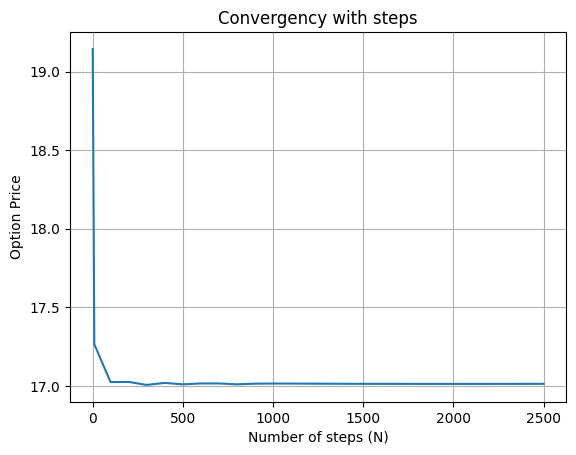

In [123]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [127]:
import os
os.getcwd()

'/Users/macbookair/Library/Mobile Documents/com~apple~CloudDocs/WQU/4. Derivatives Pricing'